## Pygrib NBM Quick Start

Quick look at pygrib and National Blended Model data


In [1]:
import pygrib

# Random Library Imports
import os,glob

# CartoPy Map Plotting Libraires
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Matplotlib Plotting Libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

<frozen importlib._bootstrap>:219: UserWarning: Warning: ecCodes 2.19.1 or higher is recommended. You are running 2.17.0.


## Use ```glob``` to grab the names of all the gfs files

In [57]:
grb_path = "blend.t00z.master.f001.co"
grib_list = sorted(glob.glob(f"{grb_path}*.grib2"))
list(grib_list)

[]

## Grabbing the first grib file from our list will allow us to explore the data
* Each entry of the file is a different variable (specified at different heights for most)

In [58]:
# grab first file in list (conus)
grbs = pygrib.open(grib_list[0])
grb = grbs.read()

IndexError: list index out of range

In [59]:
list(grb)

[1:Apparent temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 1 hrs:from 202005190600,
 2:Convective available potential energy:J kg**-1 (instant):lambert:surface:level 0:fcst time 1 hrs:from 202005190600,
 3:Ceiling:m (instant):lambert:unknown:level 0 215:fcst time 1 hrs:from 202005190600,
 4:Ceiling:m (instant):lambert:cloudBase:level 0:fcst time 1 hrs:from 202005190600,
 5:2 metre dewpoint temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 1 hrs:from 202005190600,
 6:Downward short-wave radiation flux:W m**-2 (instant):lambert:surface:level 0:fcst time 1 hrs:from 202005190600,
 7:3:3 (instant):lambert:cloudTop:level 0:fcst time 1 hrs:from 202005190600,
 8:238:238 (instant):lambert:isobaricLayer:levels 40000-30000 Pa:fcst time 1 hrs:from 202005190600,
 9:228:228 (accum):lambert:surface:level 0:fcst time 0-1 hrs (accum):from 202005190600,
 10:Turbulence:code table (4.208) (instant):lambert:unknown:levels 0-1372:fcst time 1 hrs:from 202005190600,


In [164]:
# play with cape values - second in the list of variables

precip_grib = grb[18]
print(precip_grib)
precip,lat,lon = precip_grib.data() # -> gets all the plot data in one call
#lat,lon = cape_grib.latlons() #-> just different way of accessing lat/lon; same outcome
precip.shape,lat.shape,lon.shape

19:202:202 (instant):lambert:unknown:levels 610-40000 m:fcst time 1 hrs:from 202005190600


((1597, 2345), (1597, 2345), (1597, 2345))

In [165]:
# all the delicious metadata goodies for this variable
        
precip_grib.keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatest',
 'grib2divider',
 'is_efas',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'section3Length',
 'numberOfSection',
 'sourceOfGridDefinition

In [166]:
precip_grib.typeOfLevel

'unknown'

In [167]:
# uncomment to check cape data values
#cape
print(lat)
type(lat)


[[19.229      19.23419445 19.23938511 ... 20.34034804 20.33604919
  20.33174644]
 [19.25112363 19.25631917 19.26151093 ... 20.36270393 20.3584042
  20.35410056]
 [19.27324788 19.27844452 19.28363738 ... 20.38506038 20.38075976
  20.37645523]
 ...
 [53.01277632 53.01903163 53.02528215 ... 54.34521296 54.3400818
  54.3349458 ]
 [53.0316719  53.03792737 53.04417805 ... 54.36413781 54.35900656
  54.35387046]
 [53.0505631  53.05681873 53.06306956 ... 54.38305814 54.3779268
  54.37279061]]


numpy.ndarray

In [168]:
precip_grib['dataDate'],precip_grib['hour'], precip_grib['minute'],precip_grib['forecastTime'],precip_grib['dataTime']

(20200519, 6, 0, 1, 600)

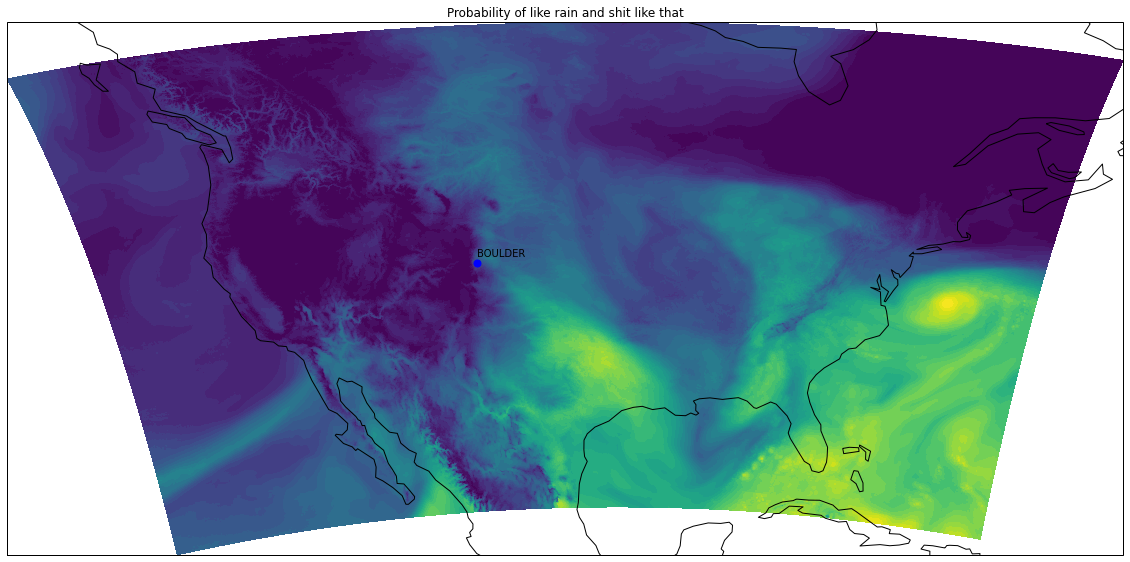

In [174]:
fig = plt.figure(figsize=(20, 20))

ax = plt.axes(projection=ccrs.PlateCarree())


##Wtf is plate carree
plt.contourf(lon, lat, precip, 40,
            transform=ccrs.PlateCarree())

ax.text(-105, 40.5, 'BOULDER ', transform=ccrs.Geodetic()) #Plots Boulder City as a point
ax.plot(-105, 40, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.coastlines() #Coastlines
##ax.add_feature(borders) country borders
#ax.set_extent([-111, -99, 35, 42], crs=ccrs.PlateCarree())
ax.set_aspect(1)
plt.title('Probability of like rain and shit like that')

plt.show()